Links:
- https://github.com/hardmaru/WorldModelsExperiments
- http://blog.otoro.net//2018/06/09/world-models-experiments/


In [337]:
%matplotlib inline
import numpy as np
import importlib
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import gym
import torch
import torch.nn as nn
from torchvision.transforms import Compose, ToTensor, ToPILImage
from torchsummary import summary
import vaelin
VAELin = importlib.reload(vaelin).VAELin
from dataset import VAEDataset
from torch.utils.data import DataLoader

from PIL import Image

In [240]:
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./mnist', train=True, download=True, transform=None)

In [338]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = VAELin(device=device).to(device)

In [339]:
dataset = VAEDataset(transform=Compose([
        ToTensor()
    ]))

In [340]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

In [343]:
losses = []
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [352]:
summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Reshape-1                [-1, 12288]               0
            Linear-2                  [-1, 400]       4,915,600
              ReLU-3                  [-1, 400]               0
            Linear-4                   [-1, 32]          12,832
            Linear-5                   [-1, 32]          12,832
            Linear-6                  [-1, 400]          13,200
              ReLU-7                  [-1, 400]               0
            Linear-8                [-1, 12288]       4,927,488
           Reshape-9            [-1, 3, 64, 64]               0
          Sigmoid-10            [-1, 3, 64, 64]               0
Total params: 9,881,952
Trainable params: 9,881,952
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.39
Params size (MB): 37.70
Estima

In [344]:
with tqdm_notebook() as bar:
    for _ in range(10):
        for i, batch in enumerate(dataloader):
            batch = batch.to(device)
            optimizer.zero_grad()
            original, decoded, encoded, z, mu, logvar = model.forward(batch)
            loss = model.loss(original, decoded, mu, logvar)
            losses.append(loss.detach().cpu().numpy())
            loss.backward()
            optimizer.step()
            bar.update(1)
            bar.set_description("loss: {}".format(losses[-1]))

In [345]:
np_losses = np.array(losses)

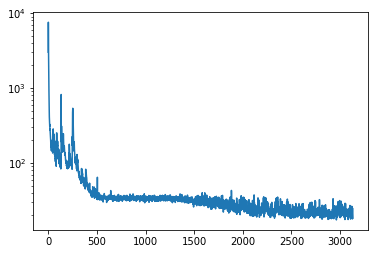

In [347]:
plt.semilogy(np_losses)

In [348]:
model.loss(original, decoded, mu, logvar)

tensor(18.4032, device='cuda:0', grad_fn=<ThAddBackward>)

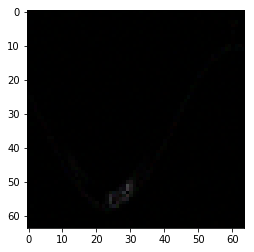

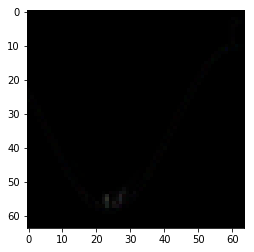

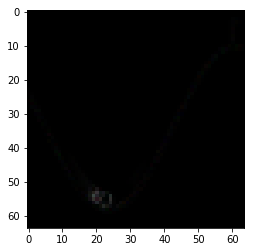

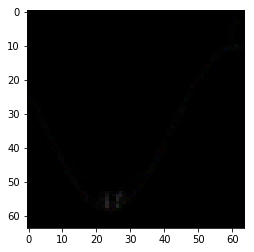

In [349]:
for i in [100, 200, 300, 400]:
    temp = dataset[i].cuda(device).reshape((1, 3, 64, 64))
    inim = temp[0].detach().cpu().numpy().transpose((1,2,0))
    outim = model.forward(temp)[1][0].detach().cpu().numpy().transpose((1,2,0))
    plt.imshow(np.abs(outim-inim))
    plt.show()

# plt.imshow(outim)
# plt.show()


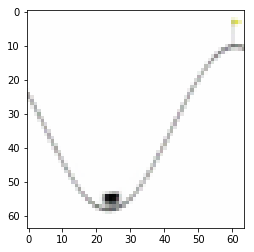

In [350]:
temp = dataset[0].to(device).reshape((1, 3, 64, 64))
plt.imshow(model.forward(temp)[1][0].detach().cpu().numpy().transpose((1,2,0)))
plt.show()

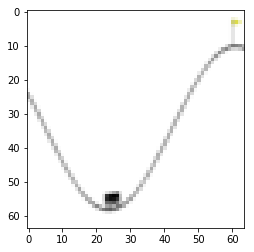

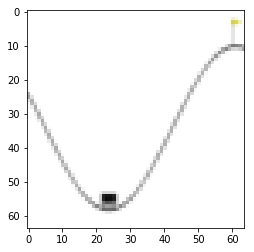

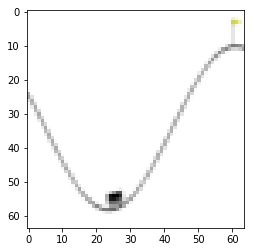

In [351]:
for i in [0, 23, 200]:
    plt.imshow(dataset[i].detach().cpu().numpy().transpose((1,2,0)))
    plt.show()

In [94]:
Imagedataset[i].detach().cpu().numpy()

(3, 64, 64)